# 🦠 Data preparation:
1. Assigning the microbes into different genera -> will be used in the community growth simulation
2. Visualize the microbial composition in the samples

In [ ]:
!git clone https://github.com/SchuShoe/Qiime_2_data materials

Cloning into 'materials'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 34 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), done.


We will switch to working within the `materials` directory for the rest of the notebook.

In [ ]:
%cd materials

/content/materials/materials


Now we are ready to set up our environment. This will take about 10-15 minutes. 

**Note**: This setup is only relevant for Google Colaboratory and will not work on your local machine. Please follow the [official installation instructions](https://docs.qiime2.org/2021.8/install/) for that.

In [ ]:
# Installing qiime2
!wget https://github.com/Gibbons-Lab/isb_course_2021/raw/main/setup_qiime2

%run setup_qiime2

--2022-03-12 19:10:54--  https://github.com/Gibbons-Lab/isb_course_2021/raw/main/setup_qiime2
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Gibbons-Lab/isb_course_2021/main/setup_qiime2 [following]
--2022-03-12 19:10:54--  https://raw.githubusercontent.com/Gibbons-Lab/isb_course_2021/main/setup_qiime2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4974 (4.9K) [text/plain]
Saving to: ‘setup_qiime2.1’

setup_qiime2.1      100%[===================>]   4.86K  --.-KB/s    in 0s      

2022-03-12 19:10:55 (61.3 MB/s) - ‘setup_qiime2.1’ saved [4974/4974]



[19:10:58] 🐍 Miniconda is already installed. Skipped.                        ]8;id=888562;file:///content/materials/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=529150;file:///content/materials/materials/setup_qiime2#99\99]8;;\

           🔍 Qiime 2 is already installed. Skipped.                         ]8;id=788183;file:///content/materials/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=966519;file:///content/materials/materials/setup_qiime2#126\126]8;;\

           📊 Checking that Qiime 2 command line works...                     ]8;id=122900;file:///content/materials/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=695823;file:///content/materials/materials/setup_qiime2#56\56]8;;\

[19:10:59] 📊 Qiime 2 command line looks good 🎉                              ]8;id=668808;file:///content/materials/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=10126;file:///content/materials/materials/setup_qiime2#62\62]8;;\

           🧹 Cleaned up unneeded files.                                      ]8;id=952974;file:///content/materials/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=460609;file:///content/materials/materials/setup_qiime2#51\51]8;;\

           Everything is A-OK. You can start using Qiime 2 now 👍            ]8;id=652976;file:///content/materials/materials/setup_qiime2\setup_qiime2]8;;\:]8;id=261150;file:///content/materials/materials/setup_qiime2#159\159]8;;\

<Figure size 432x288 with 0 Axes>

In [ ]:
!qiime tools import \
  --type 'SampleData[SequencesWithQuality]' \
  --input-path data/manifest.tsv \
  --output-path sequences.qza \
  --input-format SingleEndFastqManifestPhred33V2

Imported data/manifest.tsv as SingleEndFastqManifestPhred33V2 to sequences.qza


In [ ]:
!qiime demux summarize --i-data sequences.qza --o-visualization qualities.qzv

Saved Visualization to: qualities.qzv


- Reads with quality scores lower than 25 could be truncated.

# Denoising amplicon sequence variants

1. filter and trim the reads
2. find the most likely set of unique sequences in the sample (ASVs)
3. remove chimeras
4. count the abundances of each ASV

In [ ]:
!qiime dada2 denoise-single \
    --i-demultiplexed-seqs sequences.qza \
    --p-trunc-len 140 \
    --p-n-threads 2 \
    --output-dir dada2 --verbose

Running external command line application(s). This may print messages to stdout and/or stderr.
The command(s) being run are below. These commands cannot be manually re-run as they will depend on temporary files that no longer exist.

Command: run_dada_single.R /tmp/qiime2-archive-bdygtcxd/37e20ae5-5f45-46f5-ad8c-9b07b2f35709/data /tmp/tmpenwc64uz/output.tsv.biom /tmp/tmpenwc64uz/track.tsv /tmp/tmpenwc64uz 140 0 2.0 2 Inf independent consensus 1.0 2 1000000 NULL 16

R version 4.0.5 (2021-03-31) 
Loading required package: Rcpp
DADA2: 1.18.0 / Rcpp: 1.0.7 / RcppParallel: 5.1.4 
1) Filtering .............
2) Learning Error Rates
114788240 total bases in 819916 reads from 13 samples will be used for learning the error rates.
3) Denoise samples .............
4) Remove chimeras (method = consensus)
5) Report read numbers through the pipeline
6) Write output
Saved FeatureTable[Frequency] to: dada2/table.qza
Saved FeatureData[Sequence] to: dada2/representative_sequences.qza
Saved SampleData[DAD

In [ ]:
!qiime metadata tabulate \
    --m-input-file dada2/denoising_stats.qza \
    --o-visualization dada2/denoising-stats.qzv

Saved Visualization to: dada2/denoising-stats.qzv


# Phylogeny and diversity

## Building a tree

We can build a phylogenetic tree for our sequences using the following command:

In [ ]:
!qiime phylogeny align-to-tree-mafft-fasttree \
    --i-sequences dada2/representative_sequences.qza \
    --output-dir tree

Saved FeatureData[AlignedSequence] to: tree/alignment.qza
Saved FeatureData[AlignedSequence] to: tree/masked_alignment.qza
Saved Phylogeny[Unrooted] to: tree/tree.qza
Saved Phylogeny[Rooted] to: tree/rooted_tree.qza


We can create a visualization for the tree using the [empress](https://github.com/biocore/empress) Qiime 2 plugin.

In [ ]:
pip install empress

In [ ]:
!qiime empress tree-plot \
    --i-tree tree/rooted_tree.qza \
    --o-visualization tree/empress.qzv

Saved Visualization to: tree/empress.qzv


In [ ]:
!qiime diversity core-metrics-phylogenetic \
    --i-table dada2/table.qza \
    --i-phylogeny tree/rooted_tree.qza \
    --p-sampling-depth 10000 \
    --m-metadata-file data/metadata.tsv \
    --output-dir diversity

Saved FeatureTable[Frequency] to: diversity/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: diversity/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/evenness_vector.qza
Saved DistanceMatrix to: diversity/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity/jaccard_distance_matrix.qza
Saved DistanceMatrix to: diversity/bray_curtis_distance_matrix.qza
Saved PCoAResults to: diversity/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: diversity/weighted_unifrac_pcoa_results.qza
Saved PCoAResults to: diversity/jaccard_pcoa_results.qza
Saved PCoAResults to: diversity/bray_curtis_pcoa_results.qza
Saved Visualization to: diversity/unweighted_unifrac_emperor.qzv
Saved Visualization to: diversity/weighted_unifrac_emperor.qzv
Saved

# Taxonomy

We will use a Bayes classifier trained on the GreenGenes database which can be downloaded from https://docs.qiime2.org/2021.4/data-resources/.

In [ ]:
!wget https://data.qiime2.org/2021.8/common/gg-13-8-99-515-806-nb-classifier.qza

--2022-03-12 19:22:59--  https://data.qiime2.org/2021.8/common/gg-13-8-99-515-806-nb-classifier.qza
Resolving data.qiime2.org (data.qiime2.org)... 54.200.1.12
Connecting to data.qiime2.org (data.qiime2.org)|54.200.1.12|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://s3-us-west-2.amazonaws.com/qiime2-data/2021.8/common/gg-13-8-99-515-806-nb-classifier.qza [following]
--2022-03-12 19:22:59--  https://s3-us-west-2.amazonaws.com/qiime2-data/2021.8/common/gg-13-8-99-515-806-nb-classifier.qza
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.220.104
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.220.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28289645 (27M) [binary/octet-stream]
Saving to: ‘gg-13-8-99-515-806-nb-classifier.qza’

gg-13-8-99-515-806- 100%[===================>]  26.98M  10.6MB/s    in 2.5s    

2022-03-12 19:23:03 (10.6 MB/s) - ‘gg-13-8-99-515-806-nb-

In [ ]:
!qiime feature-classifier classify-sklearn \
    --i-reads dada2/representative_sequences.qza \
    --i-classifier gg-13-8-99-515-806-nb-classifier.qza \
    --p-n-jobs 2 \
    --o-classification taxa.qza

Saved FeatureData[Taxonomy] to: taxa.qza


The relative abundances of the different bacterial taxa we have in each sample:

In [ ]:
!qiime taxa barplot \
    --i-table dada2/table.qza \
    --i-taxonomy taxa.qza \
    --m-metadata-file data/metadata.tsv \
    --o-visualization taxa_barplot.qzv

Saved Visualization to: taxa_barplot.qzv


Collapse data on a particular taxonomic rank using the QIIME 2 [taxa plugin](https://docs.qiime2.org/2021.4/plugins/available/taxa/).

In [ ]:
!qiime taxa collapse \
    --i-table dada2/table.qza \
    --i-taxonomy taxa.qza \
    --p-level 6 \
    --o-collapsed-table genus.qza

Saved FeatureTable[Frequency] to: genus.qza


Export the table and convert it to a .csv file so that we can analyze these data using tools outside of the QIIME 2 environment.

In [ ]:
!qiime tools export \
    --input-path genus.qza \
    --output-path exported
!biom convert -i exported/feature-table.biom -o genus.tsv --to-tsv

Exported genus.qza as BIOMV210DirFmt to directory exported


Generate a heatmap using Pandas and Seaborn. 

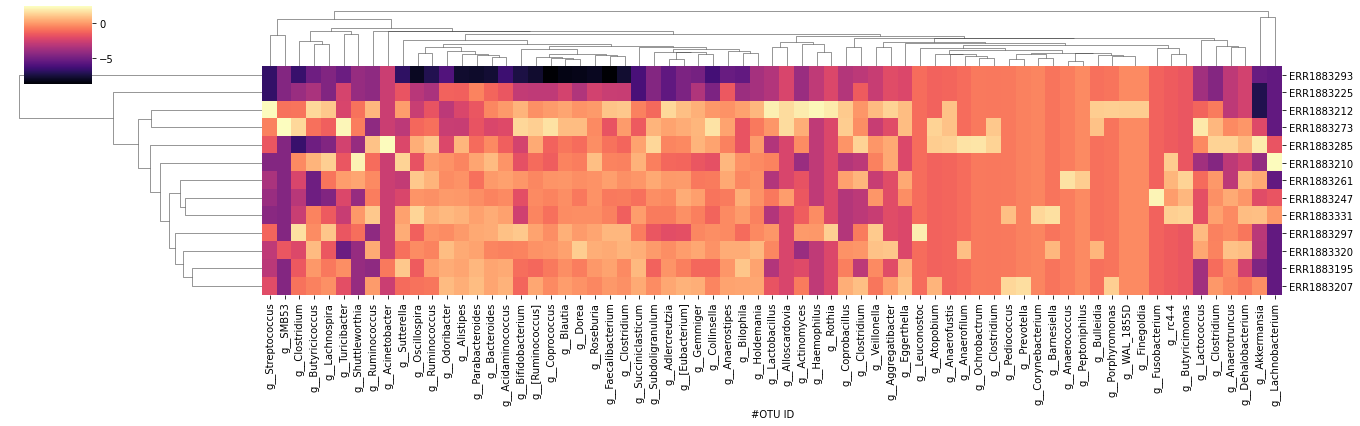

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

abundances = pd.read_table("genus.tsv", skiprows=1, index_col=0)
abundances.index = abundances.index.str.split(";").str[5]       # Use only the genus name
abundances = abundances[~abundances.index.isin(["g__", "__"])]  # remove unclassified genera
abundances = abundances.iloc[0:100]                             # use only the first 100 genera

# Let's do a centered log-ratio transform: log x_i - log mean(x)
transformed = abundances.apply(
    lambda xs: np.log(xs + 0.5) - np.log(xs.mean() + 0.5),
    axis=1)

sns.clustermap(transformed.T, cmap="magma", xticklabels=True, figsize=(19, 6))